# Predicting heart disease using machine learning
An attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

**Import required libraries and tools**

In [1]:
# EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

**Load data**

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Exploratory data analysis (EDA)**

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Find all the classifications
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

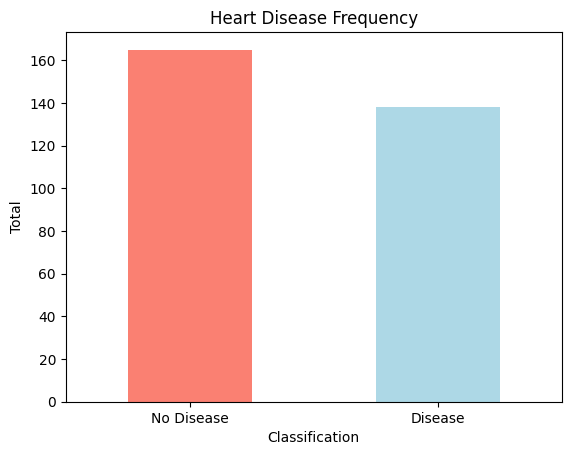

In [6]:
# Visualize labels
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);
plt.title('Heart Disease Frequency')
plt.xlabel('Classification')
plt.ylabel('Total')
plt.xticks(ticks=[0,1], labels=['No Disease', 'Disease'], rotation=0);

In [7]:
# Check if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Co-relate data**

In [9]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


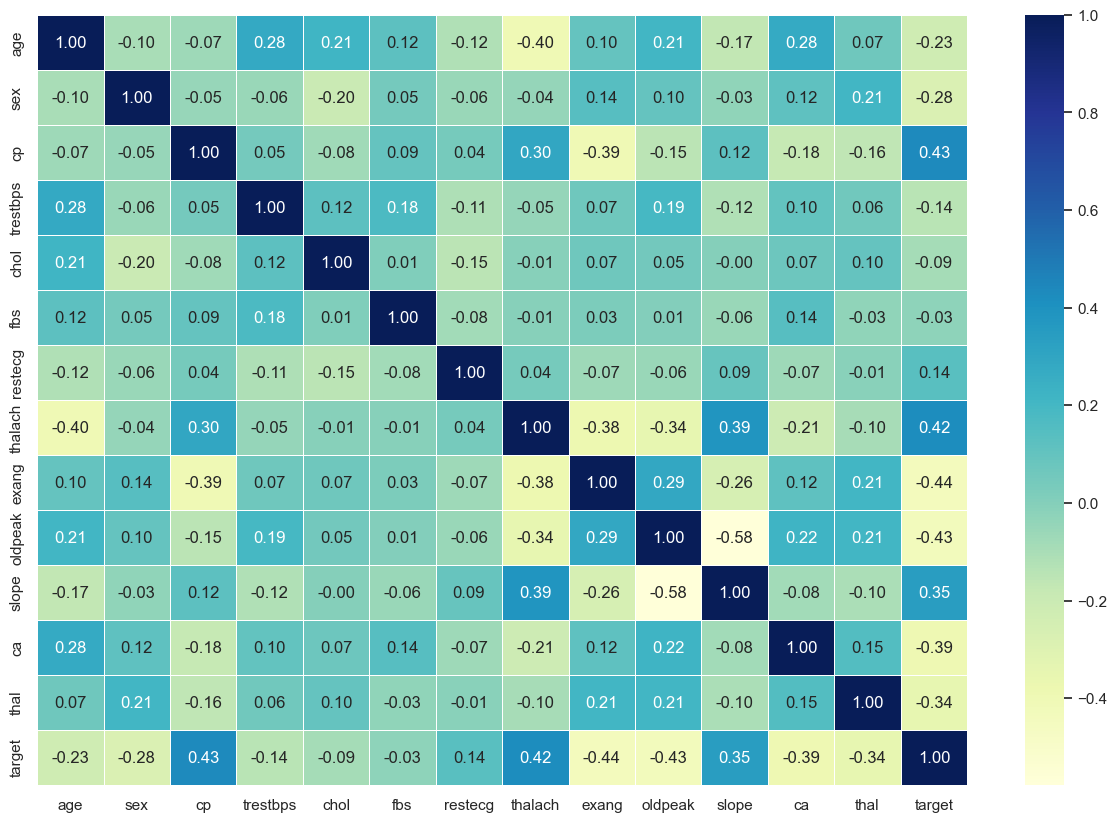

In [100]:
# Visualize correlation matrix
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='YlGnBu')

**Heart Disease Frequency according to Gender**

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


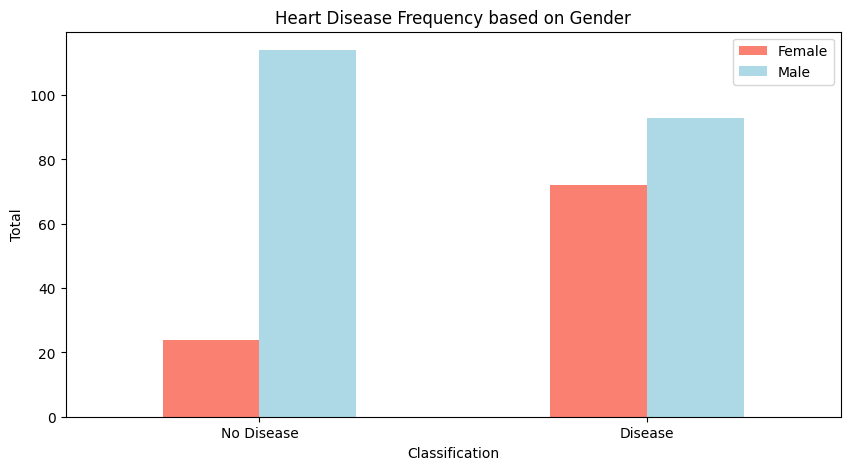

In [13]:
pd.crosstab(df['target'], df['sex']).plot.bar(figsize=(10,5), color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency based on Gender')
plt.xlabel('Classification')
plt.ylabel('Total')
plt.legend(['Female', 'Male'])
plt.xticks(ticks=[0,1], labels=['No Disease', 'Disease'], rotation=0);


Observations: 
* Females have 75% chances of heart disease
* Males have less than 50% chances of heart disease

**Age vs Max Heart Rate**

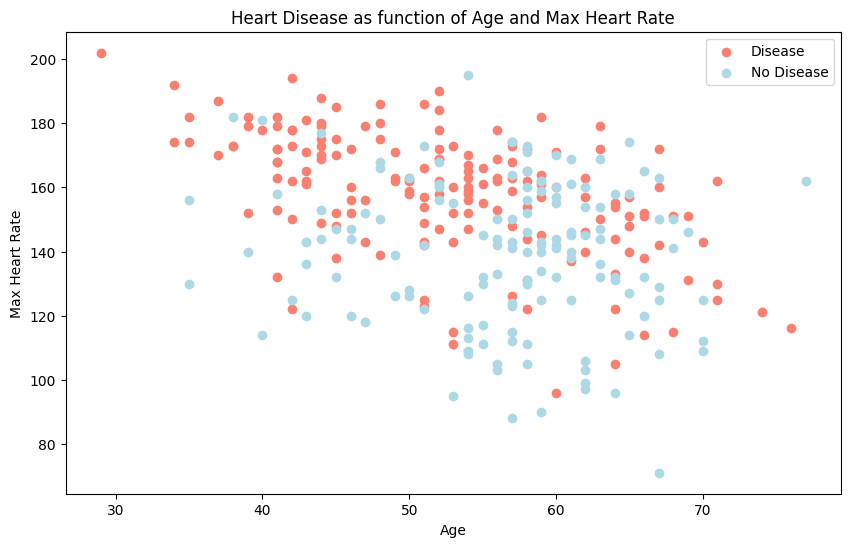

In [14]:
plt.figure(figsize=(10, 6))

# Scatter with positive labels
plt.scatter(df[df['target']==1]['age'],
            df[df['target']==1]['thalach'],
            c='salmon')

# Scatter with negative labels
plt.scatter(df[df['target']==0]['age'],
            df[df['target']==0]['thalach'],
            c='lightblue')

plt.title('Heart Disease as function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

Observations:
* Decrease in max heart rate with increasing age
* Positive cases frequency is more at higher max heart rate

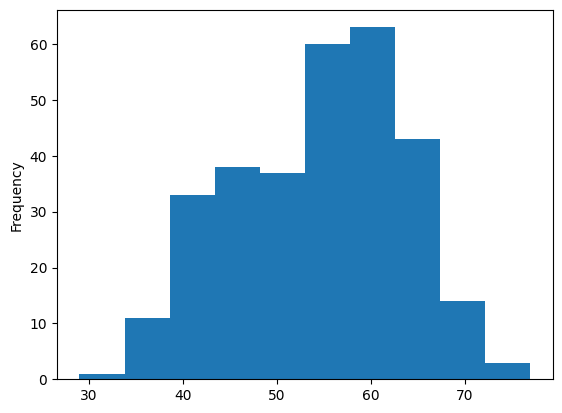

In [15]:
# Distribution of age column with histogram
df.age.plot.hist();

**Heart Disease Frequency based on Chest Pain Type**

In [16]:
pd.crosstab(df['target'], df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


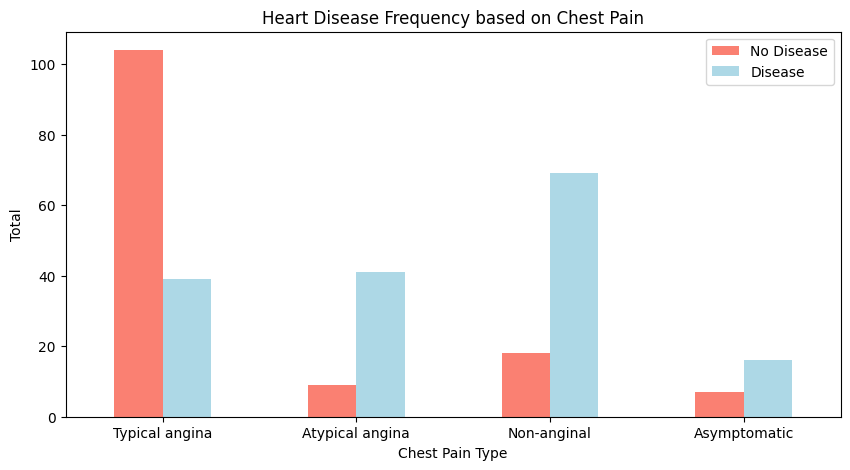

In [17]:
# Visualize the crosstab
pd.crosstab(df['cp'], df['target']).plot.bar(figsize=(10,5),
                                             color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency based on Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Total')
plt.legend(['No Disease', 'Disease'])
plt.xticks(ticks=[0,1,2,3],
           labels=['Typical angina', 'Atypical angina', 'Non-anginal', 'Asymptomatic'],
           rotation=0);

Observations:
* Atypical and Non-anginal type chest pain have high chances of leading to heart disease
* Typical angina has less positive occurances to total ratio

**Modelling**

In [18]:
# Split the data into features and labels
X = df.drop('target', axis=1)
y = df['target']

In [19]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

Try 3 different models:
1. Logistic Regression
2. K-Nearest Classifier
3. Random Forest Classifier

In [21]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    """
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [22]:
model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

c:\Users\Sarthak Gour\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

**Model Comparison**

In [23]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


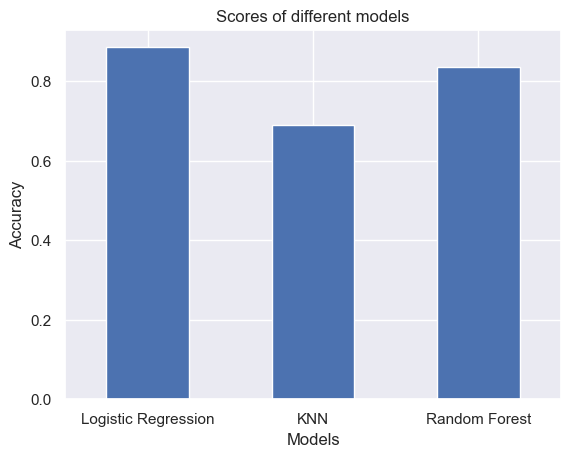

In [103]:
# Visualize model's scores
model_compare.T.plot.bar(legend=False)
plt.title('Scores of different models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=0);

**Hyperparameter tuning KNN model**

In [25]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # fit model and evaluate
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [26]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

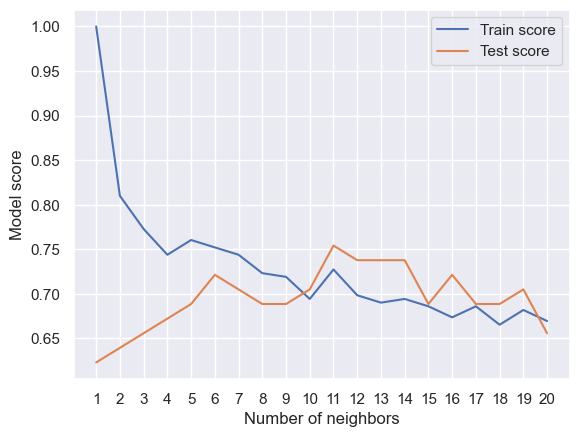

In [104]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
plt.xticks(range(1,21));

In [29]:
# Max score for KNN model
max(test_scores)

0.7540983606557377

Observation:
* Even after tuning, KNN's score(0.754) is far below Logistic Regression(0.885)

**Hyperparameter tuning with RandomSearchCV** <br>
Tuning both models:
* LogisticRegression
* RandomForest

In [30]:
# Create a hyperparameter grid for LogisticRegression
lr_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rfc_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10], 
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Tuning LogisticRegression()

In [31]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit the randomize model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Tuning RandomForestClassifier()

In [34]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rfc_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit the randomize model
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rfc.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
rs_rfc.score(X_test, y_test)

0.8688524590163934

**Hyperparameter Tuning with GridSearchCV**

In [40]:
lr_grid = {'C': np.logspace(-4, 4, 20),
           'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=lr_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

**Evaluating tuned classifier**

In [43]:
# Make prediction with tuned model
y_pred = gs_log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

c:\Users\Sarthak Gour\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ROC curve')

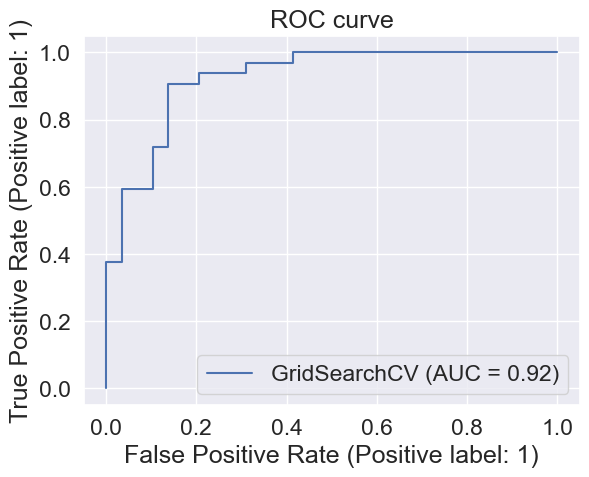

In [53]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)
plt.title('ROC curve')

In [48]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[25  4]
 [ 3 29]]


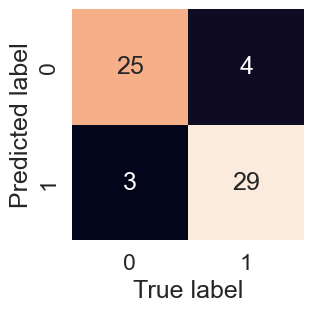

In [52]:
# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [54]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Calculate evaluation metrics using cross-validation

In [55]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [60]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [61]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [82]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [68]:
# Cross-validated precision
cv_prec = cross_val_score(clf, X, y, cv=5, scoring='precision').mean()
cv_prec

0.8215873015873015

In [66]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall').mean()
cv_recall

0.9272727272727274

In [69]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1').mean()
cv_f1

0.8705403543192143

In [84]:
# Create cross validate metrics dataframe
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_prec,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                           index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1')])

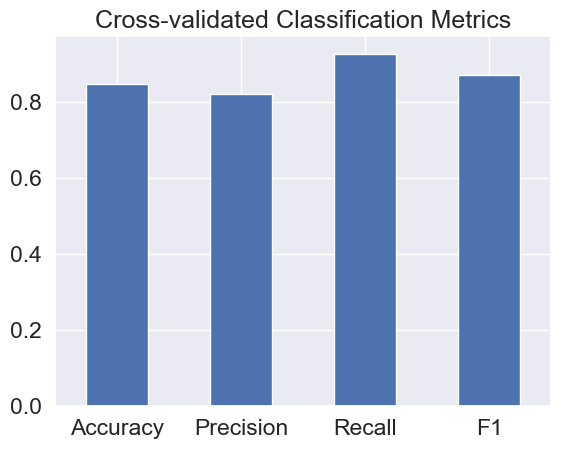

In [88]:
# Visualize cross-validated metrics
cv_metrics.T.plot.bar(legend=False)
plt.title('Cross-validated Classification Metrics')
plt.xticks(rotation=0)

**Important Features**

In [89]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [92]:
# Check coef
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [93]:
# Match coef's features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

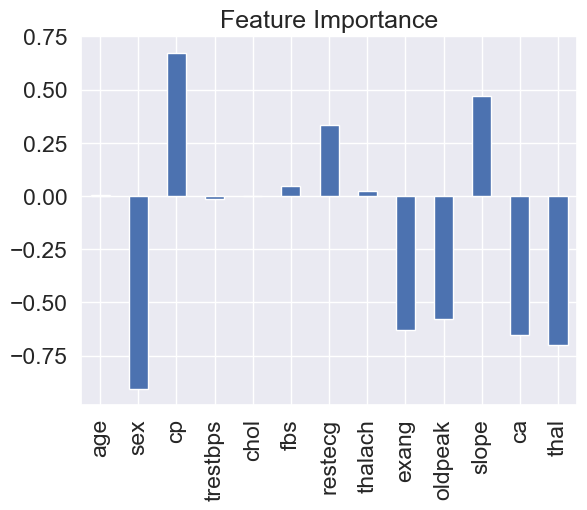

In [95]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance', legend=False);